# BMI/CS 576 Fall 2021 - HW4
The objectives of this homework are to practice

* Markov chain parameter estimation and prediction
* HMM parameter estimation with the Baum–Welch algorithm
* designing HMMs and evaluating their accuracy

## HW policies
Before starting this homework, please read over the [homework policies](https://canvas.wisc.edu/courses/270854/pages/hw-policies) for this course.  In particular, note that homeworks are to be completed *individually* and plagiarism from any source (with the one exception noted below) will be considered academic misconduct.

You are welcome to use any code from the weekly notebooks (including the official solutions) in your solutions to the HW.

## PROBLEM 1: Markov chain parameter estimation and prediction (25 points)

Suppose there are two classes of DNA sequences: A and B.  For each class, you are given three sequences that are of that class.  In this problem, we will model these classes of sequences using a simple Markov chain with a state for each of the four DNA bases.  We will omit the end state for this model.

| sequence    | class |
| ------------|-------|
| CCCAAAAAAA  |   A   |
| AAAGCCCTTT  |   A   |
| TAGGCCCGCC  |   A   |
| GCGAAAGCCG  |   B   |
| CCTGAGGTGC  |   B   |
| TACTACAGTG  |   B   |

**(A)** Using these sequences, estimate the parameters of a Markov chain for class A.  Use Laplace estimates (pseudocount = 1).  You must estimate the initial state probabilities as well as the transition probabilities between states.  Show your work.

**(B)** Using these sequences, estimate the parameters of a Markov chain for class B.  Use Laplace estimates (pseudocount = 1).  You must estimate the initial state probabilities as well as the transition probabilities between states.  Show your work.

**(C)** Suppose we are given a new sequence, $x=$ `ACTTGGCCTA`, of unknown class.  Using your parameters from (A), compute the probability of this sequence given that it is of class A.  That is, if $X$ and $Y$ are random variables representing the sequence and its true class, respectively, compute $P(X = x | Y = A)$.  Show your work.

**(D)** Using your parameters from (B), compute the probability of the sequence in (C) given that it is of class B.  That is, compute $P(X = x | Y = B)$. Show your work.

**(E)** Suppose the prior probability of a sequence being of class A is $P(Y = A) = 0.75$ (and thus that $P(Y = B) = 0.25)$.  What is the posterior probability of the sequence being of class A?  That is, compute $P(Y = A | X = x)$.  Show your work.

###
### Your solution to Problem 1 here
###


1A) 

Pr(a) = (n_a + 1) / (sum(n_i) + 4)

Pr(a) = 12 / 34 = 6 / 17 

Pr(c) = 12 / 34 = 6 / 17

Pr(g) =           5 / 34   

Pr(t) =           5 / 34

|  + 	|  a 	|  c 	|  g 	|  t 	|
|---	|---	|---	|---	|---	|
|  a 	|  9/14 	|  1/14 	|  3/14 	|  1/14 	|
|  c 	|  2/14 	|  8/14 	|  2/14 	|  2/14  	|
|  g 	|  1/8 	|  4/8 	|  2/8 	|  1/8 	|
|  t 	|  2/7 	|  1/7 	|  1/7 	|  3/7 	|
|  begin 	|  2/7 	|  2/7 	|  1/7 	|  2/7 	|

Pr(c | a) = matrix[a][c]

1B) 

Pr(a) =           8 / 34

Pr(c) =           9 / 34

Pr(g) =           11 / 34

Pr(t) =           6 / 34

|  + 	|  a 	|  c 	|  g 	|  t 	|
|---	|---	|---	|---	|---	|
|  a 	|  3/11 	|  3/11 	|  4/11 	|  1/11 	|
|  c 	|  2/11 	|  3/11 	|  3/11 	|  3/11  	|
|  g 	|  3/12 	|  4/12 	|  2/12 	|  3/12 	|
|  t 	|  3/9 	|  1/9 	|  4/9 	|  1/9 	|
|  begin 	|  1/7 	|  2/7 	|  2/7 	|  2/7 	|



1C) 

$x=$ `ACTTGGCCTA`

Pr(x = x | y = a) = Pr(a | t) * Pr(t | c) * Pr(c | c) * Pr(c | g) * Pr(g | g) * Pr(g | t) * Pr(t | t) * Pr(t | c) * Pr(c | a) * Pr(a)

Pr(x = x | y = a) = 2 / 7 * 2 /14 * 8 / 14 * 4 / 8 * 2 / 8 * 1 / 7 * 3 / 7 * 2 / 14 * 1 / 14 * 6 / 17 = 6.42846536e-7



1D) 

Pr(x = x | y = b) = 8 / 34 * 3 / 11 * 3 / 11 * 1 / 9 * 4 / 9 *  2 / 12 * 4 / 12 * 3 / 11 * 3 / 11 * 3 / 9 = 0.00000119043



1E) 

$P(Y = A | X = x)$ = ( P ( X = x | Y = a ) * P (Y = A) ) / ( P ( Y | a ) * P ( X = x | Y = a ) + P ( Y | b ) * P ( X = x | Y = b ) )


$P(Y = A | X = x)$ = (6.42846536e-7 * 0.75) / (0.75 * 6.42846536e-7 + 0.25 * 0.00000119043) = 0.61832587372


## PROBLEM 2: The Baum–Welch algorithm (25 points)

Consider the hidden Markov model depicted below.  This model emits sequences consisting of the characters `A` and `T` and has three states (other than the start state).  This model does not include an end state.

![Problem 2 HMM State Transition Diagram](p2_hmm.png)

Suppose we are given a single sequence, $x = $ `ATTAA`, as data with which to train the parameters of this model.  In this problem, you will run one iteration of the Baum–Welch algorithm starting with the initial parameters shown in the diagram above.  The values of the forward, backward, and posterior matrices are already computed and given below.

**Forward matrix**

|state\position   |  1 (A) |  2 (T) |  3 (T) |  4 (A) |  5 (A) |
|-----------------|--------|--------|--------|--------|--------|
|**1**            | 0.3000 | 0.0260 | 0.0036 | 0.0111 | 0.0101 |
|**2**            | 0.1667 | 0.0833 | 0.0379 | 0.0182 | 0.0081 |
|**3**            | 0.0333 | 0.0660 | 0.0574 | 0.0050 | 0.0007 |


**Backward matrix**

|state\position   |  1 (A) |  2 (T) |  3 (T) |  4 (A) |  5 (A) |
|-----------------|--------|--------|--------|--------|--------|
|**1**            | 0.0210 | 0.0709 | 0.5888 | 0.7800 | 1.0000 |
|**2**            | 0.0598 | 0.1250 | 0.2724 | 0.5000 | 1.0000 |
|**3**            | 0.0795 | 0.1007 | 0.1128 | 0.2200 | 1.0000 |

**Posterior matrix**

|state\position   |  1 (A) |  2 (T) |  3 (T) |  4 (A) |  5 (A) |
|-----------------|--------|--------|--------|--------|--------|
|**1**            | 0.3330 | 0.0975 | 0.1113 | 0.4599 | 0.5351 |
|**2**            | 0.5269 | 0.5509 | 0.5465 | 0.4818 | 0.4282 |
|**3**            | 0.1401 | 0.3516 | 0.3422 | 0.0582 | 0.0367 |

**(A)** Using the forward (or backward) matrix, compute the probability of the sequence $x$. Show your work.

**(B)** Compute the expected emission counts ($n_{k,c}$) as part of the E-step.  Round to three digits after the decimal.  Show your work.

**(C)** Compute the expected transition counts ($n_{k \rightarrow \ell}$) as part of the E-step.  Include the expected transition counts from the start state. Round to three digits after the decimal.  Show your work.

**(D)** Using your expected emission counts from (B), compute updated values for the emission probabilities as part of the M-step.  Do **not** use pseudocounts.  Round to three digits after the decimal. Show your work.

**(E)** Using your expected transition counts from (C), compute updated values for the transition probabilities (including transition probabilities from the start state) as part of the M-step.  Do **not** use pseudocounts.  Round to three digits after the decimal.  Show your work.

**(F)** Using the updated parameters for the model, compute the probability of the sequence $x$.  You may use the HMM class code to compute this value.

###
### Your solution to Problem 2 here
###


2A) Since the hidden markov model doesn't have an end state the probability is given by the formula P(x) = sum(f_k(L)) when using the forward matrix.
Therefore we will just add the values in the last column of the forward matrix.

USING FORWARD MATRIX

0.0101 + 0.0081 + 0.0007 = 0.0189


<br>
USING BACKWARD MATRIX

a_b1 * e_1(A) * b_1(1) + a_b2 * e_2(A) * b_2(1) + a_b3 * e_3(A) * b_3(1) = 0.33 * 0.9 * 0.021 + 0.333 * 0.1 * 0.0795 + 0.33 * 0.5 * 0.0598 = 0.0188

2B) x = ATTAA

We use the posterior matrix values to compute the expected emission counts n_k,c.

n_1,A = the sum of all probabilities of posterior matrix in the first row that under a column of A

n_1,A = 0.333 + 0.4599 + 0.5351 = 1.328
<br>
Similarly we compute the expected emission counts for the other columns.

n_1,T = 0.0975 + 0.1113 = 0.209 

**Answer matrix**

|state\position   |  1 (A) |  2 (T) |
|-----------------|--------|--------|
|**1**            | 1.328  | 0.209  |
|**2**            | 1.437  | 1.097  |
|**3**            | 0.235  | 0.694  |


2C) x = ATTAA


n(begin -> 1) = f_b(0) * a_b1 * e_1(A) * b_1(1) / 0.0189 = 0.330
<br></br>

n(begin -> 2) = 1 * 0.333 * 0.5 * 0.0598 / 0.0189 = 0.522
<br></br>

n(begin -> 3) = 1 * 0.333 * 0.1 * 0.0795 / 0.0189 = 0.140


<br></br>

n(1 -> 1) = ( f_1(1) * a_11 * e_1(T) * b_1(2) + f_1(2) * a_11 * e_1(T) * b_1(3) + f_1(3) * a_11 * e_1(A) * b_1(4)+ f_1(4) * a_11 * e_1(A) * b_1(5)) / Pr(x)

(0.3000 * 0.8 * 0.1 * 0.0709 + 0.0260 * 0.8 * 0.1 * 0.5888 + 0.0036 * 0.8 * 0.9 * 0.78 + 0.0111 * 0.8 * 0.9 * 1) / 0.0189 = 0.685

<br></br>

n(1 -> 2) = ( f_1(1) * a_12 * e_2(T) * b_2(2) + f_1(2) * a_12 * e_2(T) * b_2(3) + f_1(3) * a_12 * e_2(A) * b_2(4)+ f_1(4) * a_12 * e_2(A) * b_2(5)) / Pr(x)

(0.3000 * 0.1 * 0.5 * 0.1250 + 0.0260 * 0.1 * 0.5 * 0.2724 + 0.0036 * 0.1 * 0.5 * 0.5000 + 0.0111 * 0.1 * 0.5 * 1) / 0.0189 = 0.152

<br></br>

n(1 -> 3) = ( f_1(1) * a_13 * e_3(T) * b_3(2) + f_1(2) * a_13 * e_3(T) * b_3(3) + f_1(3) * a_13 * e_3(A) * b_3(4)+ f_1(4) * a_13 * e_3(A) * b_3(5)) / Pr(x)

(0.3000 * 0.1 * 0.9 * 0.1007 + 0.0260 * 0.1 * 0.9 * 0.1128 + 0.0036 * 0.1 * 0.1 * 0.2200 + 0.0111 * 0.1 * 0.1 * 1) / 0.0189 = 0.164

<br></br>

n(2 -> 1) = ( f_2(1) * a_21 * e_1(T) * b_1(2) + f_2(2) * a_21 * e_1(T) * b_1(3) + f_2(3) * a_21 * e_1(A) * b_1(4)+ f_2(4) * a_21 * e_1(A) * b_1(5)) / Pr(x)

(0.1667 * 0.1 * 0.1 * 0.0709 + 0.0833 * 0.1 * 0.1 * 0.5888 + 0.0379 * 0.1 * 0.9 * 0.78 + 0.0182 * 0.1 * 0.9 * 1) / 0.0189 = 0.260

<br></br>

n(2 -> 2) = ( f_2(1) * a_22 * e_2(T) * b_2(2) + f_2(2) * a_22 * e_2(T) * b_2(3) + f_2(3) * a_22 * e_2(A) * b_2(4)+ f_2(4) * a_22 * e_2(A) * b_2(5)) / Pr(x)

(0.1667 * 0.8 * 0.5 * 0.1250 + 0.0833 * 0.8 * 0.5 * 0.2724 + 0.0379 * 0.8 * 0.5 * 0.5000 + 0.0182 * 0.8 * 0.5 * 1) / 0.0189 = 1.707

<br></br>

n(2 -> 3) = ( f_2(1) * a_23 * e_3(T) * b_3(2) + f_2(2) * a_23 * e_3(T) * b_3(3) + f_2(3) * a_23 * e_3(A) * b_3(4)+ f_2(4) * a_23 * e_3(A) * b_3(5)) / Pr(x)

(0.1667 * 0.1 * 0.9 * 0.1007 + 0.0833 * 0.1 * 0.9 * 0.1128 + 0.0379 * 0.1 * 0.1 * 0.2200 + 0.0182 * 0.1 * 0.1 * 1) / 0.0189 = 0.139

<br></br>

n(3 -> 1) = ( f_3(1) * a_31 * e_1(T) * b_1(2) + f_3(2) * a_31 * e_1(T) * b_1(3) + f_3(3) * a_31 * e_1(A) * b_1(4)+ f_3(4) * a_31 * e_1(A) * b_1(5)) / Pr(x)

(0.0333 * 0.1 * 0.1 * 0.0709 + 0.0660 * 0.1 * 0.1 * 0.5888 + 0.0574 * 0.1 * 0.9 * 0.78 + 0.0050 * 0.1 * 0.9 * 1) / 0.0189 = 0.259 

<br></br>

n(3 -> 2) = ( f_3(1) * a_32 * e_2(T) * b_2(2) + f_3(2) * a_32 * e_2(T) * b_2(3) + f_3(3) * a_32 * e_2(A) * b_2(4)+ f_3(4) * a_32 * e_2(A) * b_2(5)) / Pr(x)

(0.0333 * 0.1 * 0.5 * 0.1250 + 0.0660 * 0.1 * 0.5 * 0.2724 + 0.0574 * 0.1 * 0.5 * 0.5000 + 0.0050 * 0.1 * 0.5 * 1) / 0.0189 = 0.148

<br></br>

n(3 -> 3) = ( f_3(1) * a_33 * e_3(T) * b_3(2) + f_3(2) * a_33 * e_3(T) * b_3(3) + f_3(3) * a_33 * e_3(A) * b_3(4) + f_3(4) * a_33 * e_3(A) * b_3(5)) / Pr(x)

(0.0333 * 0.8 * 0.9 * 0.1007 + 0.0660 * 0.8 * 0.9 * 0.1128 + 0.0574 * 0.8 * 0.1 * 0.2200 + 0.0050 * 0.8 * 0.1 * 1) / 0.0189 = 0.486
<br></br>
<br></br>



|state\position   |      1      |     2     |     3    |
|-----------------|-------------|-----------|----------|
|**Begin**        |    0.330    |   0.522   |   0.140  |
|**1**            |    0.685    |   0.152   |   0.164  |
|**2**            |    0.260    |   1.707   |   0.139  |
|**3**            |    0.259    |   0.148   |   0.486  |

<br></br><br></br>

2d) 

e(1, A) = 1.328 / (1.328 + 0.209) = 0.879

e(1, T) = 0.209 / (1.328 + 0.209) = 0.121

e(2, A) = 1.437 / (1.437 + 1.097) = 0.567

e(2, T) = 1.097 / (1.437 + 1.097) = 0.433

e(3, A) = 0.235 / (0.235 + 0.694) = 0.253

e(3, T) = 0.694 / (0.235 + 0.694) = 0.747

<br></br>
2e) 

a_kl = (n(k -> l) / (sum(n(k -> m) for m in k)))

Using this formula we can calculate the transition probabilities for each state.


a_b1 = 0.330 / (0.330 + 0.522 + 0.140) = 0.333

a_b2 = 0.522 / (0.330 + 0.522 + 0.140) = 0.526

a_b3 = 0.140 / (0.330 + 0.522 + 0.140) = 0.141

a_11 = 0.685 / (0.685 + 0.152 + 0.164) = 0.684

a_12 = 0.152 / (0.685 + 0.152 + 0.164) = 0.152

a_13 = 0.164 / (0.685 + 0.152 + 0.164) = 0.164

a_21 = 0.260 / (0.260 + 1.707 + 0.139) = 0.123

a_22 = 1.707 / (0.260 + 1.707 + 0.139) = 0.811 

a_23 = 0.139 / (0.260 + 1.707 + 0.139) = 0.066

a_31 = 0.259 / (0.259 + 0.148 + 0.486) = 0.290

a_32 = 0.148 / (0.259 + 0.148 + 0.486) = 0.166

a_33 = 0.486 / (0.259 + 0.148 + 0.486) = 0.544

In [6]:
import hmm

states = ["1", "2", "3"]

chars = "AT"

transition_probs = [
    [0.684, 0.152, 0.164],
    [0.123, 0.811, 0.066],
    [0.290, 0.166, 0.544]
]

initial_probs =  [0.333, 0.526, 0.141]

emission_probs = [
    [0.879,0.121],
    [0.567,0.433],
    [0.253,0.747],
]

hmm1 = hmm.HiddenMarkovModel(states, chars, transition_probs, initial_probs, emission_probs)
probability = (hmm1.log_probability("ATTAA"))

print("The log probability of the sequence ATTAA:", probability)

The log probability of the sequence ATTAA: -3.4190662141249852


## PROBLEM 3: A protein domain HMM for coronaviruses (50 points)

### Protein domains in SARS-CoV-2

Segments of proteins are often classified into one or more "domains," which are indicative of their function.  A subset of domains describe the subcellular location of a protein segment.  Below is a visualization of the SARS-CoV-2 genome, with the locations of four classes of protein domains annotated: 

* signal peptide (S): parts of proteins that are generally cleaved from their parent protein and secreted from a cell.
* extracellular (E): parts of proteins that are external to the cell.
* transmembrane (T): parts of proteins that span across a membrane of the cell
* cytoplasmic (C): parts of proteins that are typically found within the cytoplasm of the cell.

![sarscov2 protein domains](sarscov2_protein_domains.png)

### A protein domain HMM for coronaviruses

In this problem, you will design an HMM for predicting the locations of these protein domains along a genome sequence. After devising the structure of the HMM you will train the model using the SARS-CoV-2 genome and annotations of the four protein domains listed above.  You will then evaluate the predictive performance of the trained HMM on the SARS-CoV-2 genome.  Ideally, we would test your HMM on a different coronavirus genome for a better assessment of the accuracy of the model, but for simplicity, we will simply use the same genome for training and testing.

### An updated HMM class

The base HMM class that we have implemented in the activities, along with a number of helper functions, are found in the `hmm` module included with this notebook.  You should add your solutions to key methods from your weekly notebooks to it and modify other aspects of it if you wish.  There are a few minor changes in how the HMM class works.  These will be helpful in improving efficiency for this problem.  The changes are:

1. States may now be represented by arbitrary strings, rather than individual characters.  As a result, a state path (such as what is returned by the `most_probable_path` method) is now represented by a *list of strings*.  This will make it easier to design an HMM with a large number of states.
2. The Viterbi, Forward, and Backward algorithms now take advantage of the sparsity (of non-zero transitions) of the HMM.  This results in efficiency gains, particular for HMMs with large numbers of states but relatively few transitions.  This is important for this problem.

**IMPORTANT NOTE:** To reap the benefits of the sparse versions of the algorithms, you will need to modify your `estimate_parameters` method such that it calls the `set_parameters` method (provided to you) to update the parameters, instead of updating the parameters within the `estimate_parameters` method itself.

In [7]:
from matplotlib import pyplot as plt

**(A)** Draw the state transition diagram (the graph with states as vertices and non-zero transitions as edges), for the HMM you devise.  Your HMM should have states representing five domain classes: S (signal peptide), E (extracellular), T (transmembrane), C (cytoplasmic), and O (other).  The O (other) domain will represent segments of the genome that do not belong to any of the four other domains.

For full credit, your model must have the following features:
1. Every domain class should be represented by one or more states.
2. Segments generated by a S, E, T, or C domain must have a length that is a multiple of three (representing the fact that these are actually segments of a protein)

You are encouraged to experiment with more complex HMMs to see if you can improve the predictive performance of the model.

**(B)** Implement your HMM as an instance of the `HMM` class and train it on the SARS-CoV-2 genome and domain annotations provided below.  Print out the estimated parameters of your model.

**(C)** With your trained model, predict the locations of the domains in the SARS-CoV-2 genome by running the Viterbi algorithm.  Compute some accuracy measures of your predictions with respect to the true domain annotations provided.  For example, you could compute
1. The base-level accuracy of your predictions: what fraction of the bases within the genome have their domain class correctly predicted?
2. The feature-level recall of your predictions: what fraction of the non-O class domains are predicted correctly (e.g., for a domain to be predicted correctly, its start and end positions must both be predicted correctly).

**(D)** With your trained model, compute at each position the posterior probability that the position is from the T (transmembrane) domain.  Make a plot of these posterior probabilities (i.e., a plot of the posterior probability of being in a transmembrane domain vs. position in the sequence).  I recommend using the pyplot function [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) for such a plot.

### SARS-CoV-2 genome and protein domain annotation
Below are the data that you are to use for this problem.  `sars2_genome` is the SARS-CoV-2 reference genome.`sarscov2_domains` is a string of the same length as the genome consisting of the characters "S", "E", "T", "C", and "O", indicating the domain annotation of each position in the genome.

In [3]:
import fasta
sarscov2_genome = fasta.read_sequences_from_fasta_file("sarscov2_genome.fasta")[0][1]
sarscov2_domains = fasta.read_sequences_from_fasta_file("domains.fasta")[0][1]

###
### Your solution to Problem 3 here
###


3a) Model
<br></br>

![HMM class](model.png)

In [36]:
##########
### 3B ###
##########

def modify_domain(states):
    sarscov2_domain_changed = []

    count = 1
    for i in range(len(sarscov2_domains)):
        if sarscov2_domains[i] != "O":
            if count < 4:
                value = str(count)
                sarscov2_domain_changed.append(sarscov2_domains[i] + value)
                count += 1

            else: 
                count = 1
                value = str(count)
                sarscov2_domain_changed.append(sarscov2_domains[i] + value)
                count += 1
        else: 
            count = 1
            sarscov2_domain_changed.append(sarscov2_domains[i])

    better_states = []

    for state in states:
        if state in sarscov2_domain_changed:
            better_states.append(state)
    print(sarscov2_domain_changed)
    return sarscov2_domain_changed, better_states


def matrix(num_rows, num_cols, initial_value=None):
    """Constructs a matrix (a list of lists)"""
    return [[initial_value] * num_cols for i in range(num_rows)]


def format_probs(states1, chars1, initial_probs1, transition_probs1, emission_probs1):
    initial_probs_list = [0] * len(states1)
    for s, prob in initial_probs1.items():
        initial_probs_list[states1.index(s)] = prob
    transition_prob_matrix = matrix(len(states1), len(states1), 0)
    for (s1, s2), prob in transition_probs1.items():
        transition_prob_matrix[states1.index(s1)][states1.index(s2)] = prob
    emission_prob_matrix = matrix(len(states1), len(chars1), 0)
    for (s, c), prob in emission_probs1.items():
        emission_prob_matrix[states1.index(s)][chars1.index(c)] = prob
    return (initial_probs_list, transition_prob_matrix, emission_prob_matrix)


states = ["S1", "S2", "S3", "C1", "C2", "C3",
          "E1", "E2", "E3", "T1", "T2", "T3", "O"]
chars = "ATGC"
new_sarscov2_domain, new_states = modify_domain(states)

training_data = [(new_sarscov2_domain, sarscov2_genome)]
hidden_markov_model = hmm.HiddenMarkovModel(new_states, chars)

hidden_markov_model.estimate_parameters(training_data)

format_transition_probs = ('\n'.join([''.join(['{:4}'.format(str(round(item, 3)) + ' ') for item in row])
                                      for row in hidden_markov_model.transition_prob_matrix]))

format_emission_probs = ('\n'.join([''.join(['{:4}'.format(str(round(item, 3)) + ' ') for item in row])
                                    for row in hidden_markov_model.emission_prob_matrix]))

print("Initial Probabilities:")
print(hidden_markov_model.initial_probs)
print()

print("Transition Probabilities:")
print(format_transition_probs)
print()

print("Emission Probabilities:")
print(format_emission_probs)
print()


['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [37]:
#**(C)** With your trained model, predict the locations of the domains in the SARS-CoV-2 genome by running the Viterbi 
#algorithm.  Compute some accuracy measures of your predictions with respect to the true domain annotations provided.  
#For example, you could compute
#1. The base-level accuracy of your predictions: what fraction of the bases within the genome have their domain class 
#correctly predicted?
#2. The feature-level recall of your predictions: what fraction of the non-O class domains are predicted correctly (e.
#g., for a domain to be predicted correctly, its start and end positions must both be predicted correctly).

# compute the base-level accuracy of your predictions
v = hidden_markov_model.viterbi_matrix(sarscov2_genome)
traceback = hidden_markov_model.viterbi_traceback(v)
base_level_correct_count = 0
for i in range(len(traceback)):
    if traceback[i] == new_sarscov2_domain[i]:
        base_level_correct_count += 1

print("Domain Length " + str(len(new_sarscov2_domain)))
print()

print("Base-level correct count: " +  str(base_level_correct_count))
base_probability = base_level_correct_count / len(new_sarscov2_domain)
print("Base-level accuracy: " + str((round(base_probability * 100, 2))) + "%" + " or " + str(base_probability))

# compute the feature-level recall of your predictions
feature_level_correct_count = 0
for i in range(len(traceback)):
    if traceback[i] == new_sarscov2_domain[i] and new_sarscov2_domain[i] != 'O':
        feature_level_correct_count += 1

print()
print("Feature-level correct count (Non-O): " +  str(feature_level_correct_count))
feature_probability = feature_level_correct_count / len(new_sarscov2_domain)
print("Feature-level recall: " + str((round((feature_level_correct_count / len(new_sarscov2_domain)) * 100, 2))) + "%" + " or " + str(feature_probability))

Domain Length 29903

Base-level correct count: 26090
Base-level accuracy: 87.25% or 0.8724877102631843

Feature-level correct count (Non-O): 23571
Feature-level recall: 78.82% or 0.7882486707019363


29903


Text(0, 0.5, 'Posterior Probability of being in a transmembrane domain')

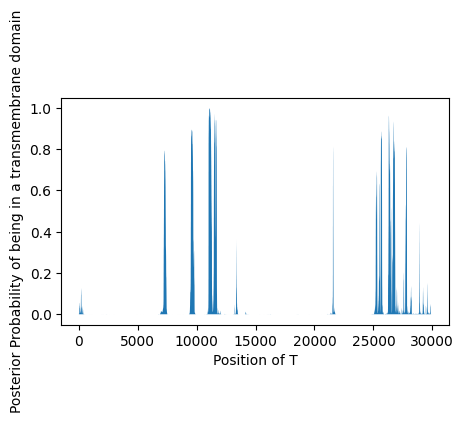

In [ ]:
#**(D)** With your trained model, compute at each position the posterior probability that the position is from the T 
#(transmembrane) domain.  Make a plot of these posterior probabilities (i.e., a plot of the posterior probability of 
#being in a transmembrane domain vs. position in the sequence).  I recommend using the pyplot function [`fill_between`]
#(https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) for such a plot.

posterior_matrix = hidden_markov_model.posterior_matrix(sarscov2_genome)


# get all t locations in the genome
t1_locations = [p for p in posterior_matrix[hidden_markov_model.states.index('T1')]]
t2_locations = [p for p in posterior_matrix[hidden_markov_model.states.index('T2')]]
t3_locations = [p for p in posterior_matrix[hidden_markov_model.states.index('T3')]]
print(len(t1_locations))

t_locations = []
# add the corresponding posterior probabilities to the t locations
for i in range(len(t1_locations)):
    t_locations.append(t1_locations[i] +  t2_locations[i] + t3_locations[i])


plt.figure(figsize=(5,3), dpi=100)
plt.fill_between(range(1, len(t_locations)+1), t_locations)
plt.xlabel("Position of T")
plt.ylabel('Posterior Probability of being in a transmembrane domain')